In [23]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


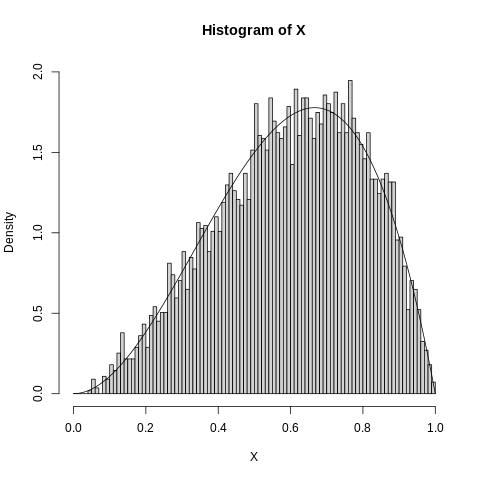

In [24]:
%%R
x = runif(10000,0,1) #gerando os valores que podem ser aceitos ou não
accept = c()

for(i in 1:length(x)){
  U = runif(1)
  if(U <= (27/4)*(x[i]^2)*(1-x[i])) {
    accept[i] = 'Yes'
  }
  else if(U > (27/4)*(x[i]^2)*(1-x[i])) {
    accept[i] = 'No'
  }
}
T = data.frame(x, accept = factor(accept, levels= c('Yes','No')))

xseq=seq(0,1,0.01)
hist(T[,1][T$accept=='Yes'], breaks = seq(0,1,0.01), ylim=c(0,2), freq = FALSE, main = 'Histogram of X', xlab = 'X')
lines(xseq, dbeta(xseq,3,2))

In [25]:
%%R
hist(T[,1][T$accept=='Yes'], freq = FALSE); lines(density(T[,1][T$accept=='Yes']), col = 2)
curve(d.beta(x), add = TRUE, from = 0, to = 1, col = 4)


Error in d.beta(x) : could not find function "d.beta"


################################################################

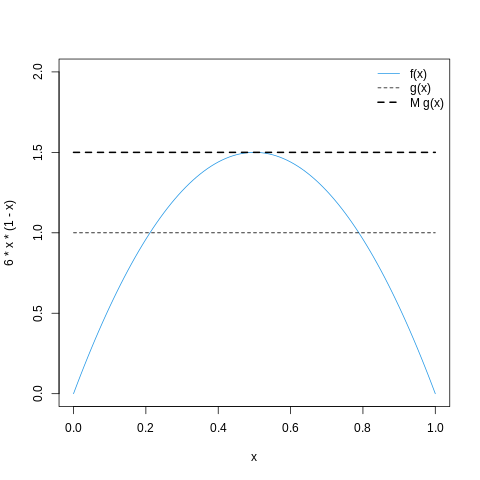

In [26]:
###### Método da aceitação-rejeição ######
# Objetivo: gerar valores de uma distribuição Beta(alfa=2, beta=2)
# Distribuição proposta:  Uniform(0,1) --> 1 + 0*x

%%R
curve(6*x*(1-x), 0, 1, col = 4, ylim = c(0, 2))
curve(1 + 0 * x, add = TRUE, lty = 2)
curve(1.5 * 1 + 0 * x, add = TRUE, lty = 2, lwd = 2)
legend("topright", legend = c("f(x)", "g(x)", "M g(x)"),
       lty = c(1, 2, 2), col = c(4, 1, 1), lwd = c(1, 1, 2), bty = "n")

In [27]:
%%R
## Criar os elementos necessários.
f <- function(x) 6*x*(1-x)
g <- function(x) 1 + 0 * x
M <- 1.5
x <- NULL

# Gerar y cuja densidade é g()
set.seed(1)
(y <- runif(n = 1, 0, 1))

# Gerar u de uma uniforme padrão
(u <- runif(n = 1))

# Calcular a razão entre as densidades
(r <- f(y)/(M * g(y)))

# Comparar e decidir
if (u < r) {
  x <- y
  print("u < r então valor aceito.")
} else {
  print("u >= r então valor descartado.")
}

[1] "u < r então valor aceito."


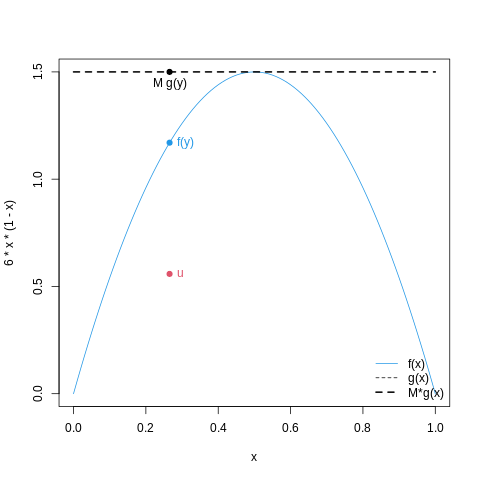

In [28]:
%%R
# Verificar os pontos no gráfico:

curve(6*x*(1-x), 0, 1, col = 4)
curve(M*1 + 0 * x, add = TRUE, lty = 2, lwd = 2)
legend("bottomright", legend = c("f(x)", "g(x)", "M*g(x)"),
       lty = c(1, 2, 2), col = c(4, 1, 1), lwd = c(1, 1, 2), bty = "n")

points(y, f(y), pch = 19, col = 4)
text(y, f(y), "f(y)", pos = 4, col = 4)

points(y, M*g(y), pch = 19, col = 1)
text(y, M*g(y), "M g(y)", pos = 1, col = 1)

points(y, u*M*g(y), pch = 19, col = 2)
text(y, u*M* g(y), "u", pos = 4, col = 2)

In [29]:
%%R
# Definir um algoritmo que repete o processo acima para um número fixo de amostras da distribuição proposta.
# Simula de uma única vez, com um valor fixo de simulações
Nsim <- 10000
set.seed(1)
# Amostra da proposta
y <- runif(Nsim, -1, 1)
# Amostra da U(0,1)
u <- runif(Nsim)
# Calcula a razão
r <- f(y)/(M * g(y))
# x será um vetor com os valores de y onde u < r
x <- y[u < r]
# Valores de u aceitos (apenas para o grafico)
ua <- u[u < r]
# Valores de u rejeitados (apenas para o grafico)
ur <- u[u >= r]

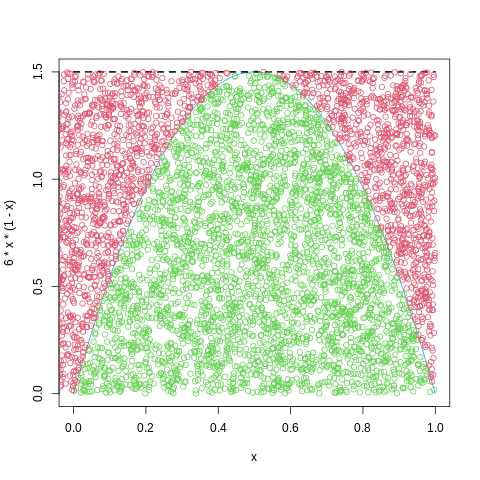

In [30]:
# Curvas
%%R
curve(6*x*(1-x), 0, 1, col = 4)
curve(M*1 + 0*x, add = TRUE, lty = 2, lwd = 2)
points(x, ua*M*g(x), col = 3)
points(y[u >= r], ur * M * g(y[u >= r]), col = 2)


In [31]:
%%R
# No R, podemos passar a função que desejamos maximizar para a função optimize()
(max <- optimize(f = function(x) {6*x*(1-x)},
                      interval = c(0, 1), maximum = TRUE))

# determinar o valor de M
(M <- max$objective/1)

[1] 1.5


In [32]:
%%R
# Proporção de pontos aceitos
length(x)/length(y)

[1] 0.3256


In [33]:
%%R
# Taxa (teorica) de aceitacao
1/M

[1] 0.6666667


In [34]:
%%R
# Proporção de pontos rejeitados
length(ur)/length(u)

[1] 0.6744


In [35]:
%%R
## Simula 10000 valores de f
N <- 10000L
x <- numeric(0)
while(length(x) < N) {
  y <- runif(1, 0, 1)
  u <- runif(1)
  r <- f(y)/(M * g(y))
  if(u < r) {
    ## Não é a forma mais eficiente!
    x <- c(x, y)
  }
}
length(x)

[1] 10000


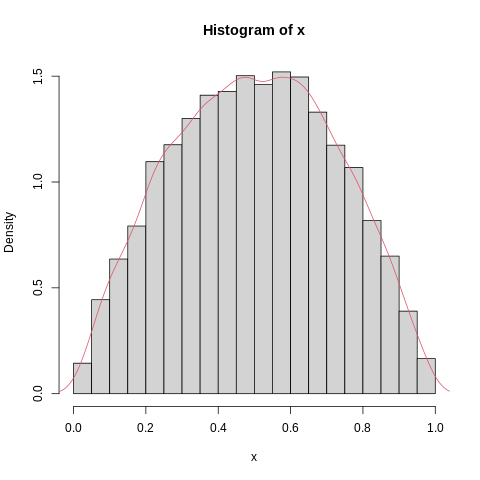

In [36]:
%%R
hist(x, freq = FALSE); lines(density(x), col = 2)